# **PT3 - ANÁLISIS DESCRIPTIVO COMPLEMENTARIO POR PAÍS, SECTOR Y EVOLUCIÓN TEMPORAL**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [2]:
# Leer archivo
df = pd.read_excel("datos_estudio_riesgovsrent.xlsx")

In [5]:
# Paleta de colores y estilo homogéneos
colores = {'tradicional': 'blue', 'impacto': 'orange'}
sns.set(style="whitegrid")

## **Análisis por País (Distribuciones KDE)**

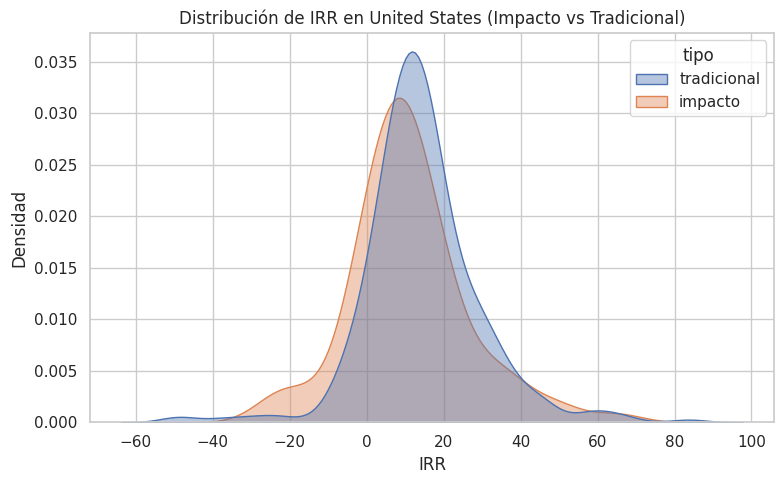

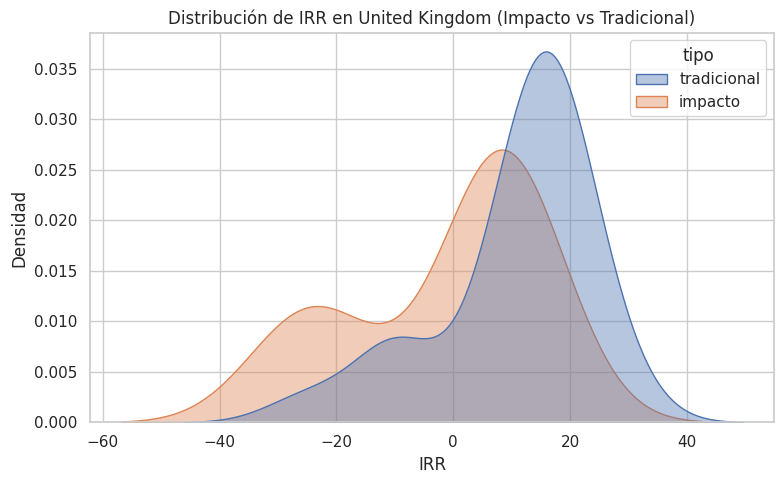

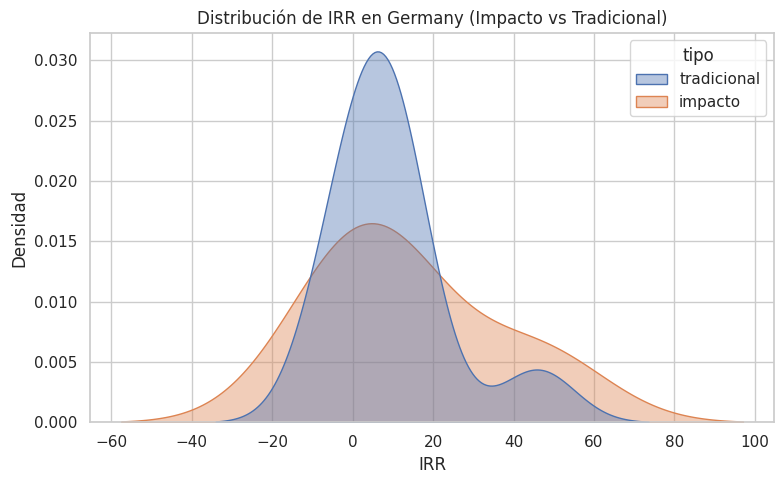

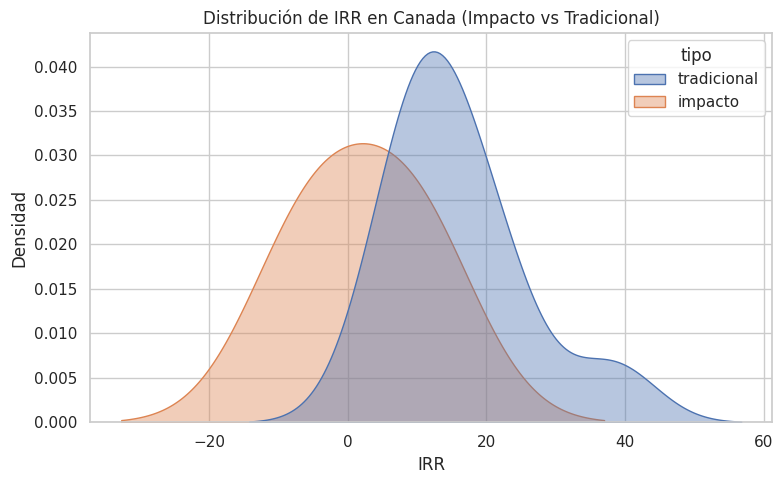

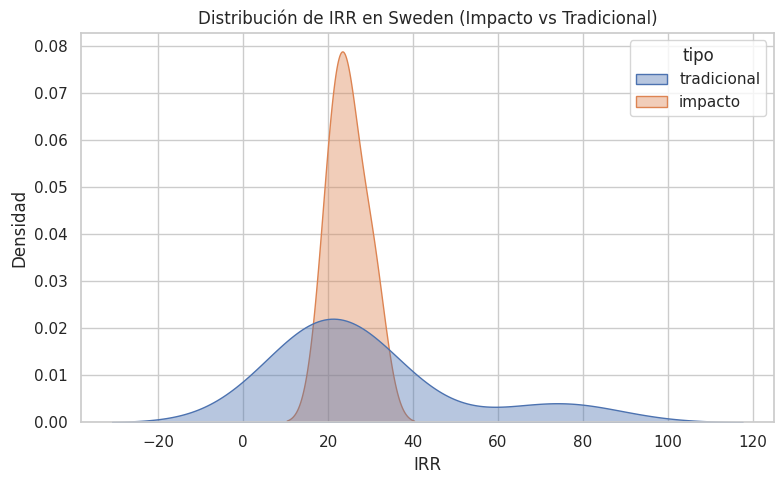

In [6]:
df['Pais'] = df['Fund Country/Territory/Region'].fillna('Desconocido')
df['Sector'] = df.get('Impact Category Preferences', df.get('Fund Type', 'Desconocido')).fillna('Desconocido')
df['Año'] = pd.to_numeric(df['Vintage'], errors='coerce')

# Limpiar y seleccionar columnas clave
df_explore = df[['IRR', 'tipo', 'Año', 'Pais', 'Sector']].dropna()

# KDE por país (top 5 países más frecuentes)
# Filtrar países con representación en ambos tipos de fondo
valid_countries = df_explore.groupby(['Pais', 'tipo']).size().unstack().dropna().index

# Filtrar el dataset a esos países
df_explore = df_explore[df_explore['Pais'].isin(valid_countries)]

# Seleccionar los top 5 países más representados entre los válidos
top_countries = df_explore['Pais'].value_counts().nlargest(5).index

for pais in top_countries:
    plt.figure(figsize=(8, 5))
    subset = df_explore[df_explore['Pais'] == pais]
    sns.kdeplot(data=subset, x='IRR', hue='tipo', fill=True, common_norm=False, alpha=0.4)
    plt.title(f"Distribución de IRR en {pais} (Impacto vs Tradicional)")
    plt.xlabel("IRR")
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.show()



## **Análisis Sectorial de Fondos de Impacto**

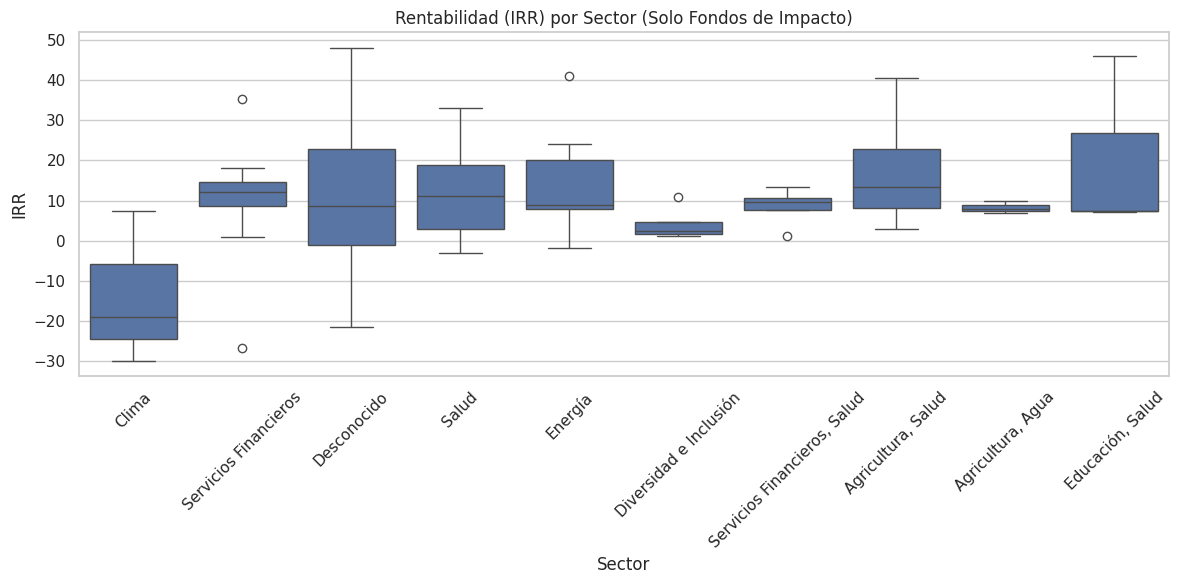

In [8]:
# 2. Boxplot por sector (solo fondos de impacto, top 10 sectores)
top_sectors = df_explore[df_explore['tipo'] == 'impacto']['Sector'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_explore[(df_explore['tipo'] == 'impacto') & (df_explore['Sector'].isin(top_sectors))],
    x='Sector',
    y='IRR'
)
plt.title("Rentabilidad (IRR) por Sector (Solo Fondos de Impacto)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## **Evolución Temporal de la Rentabilidad Media por Tipo de Fondo**

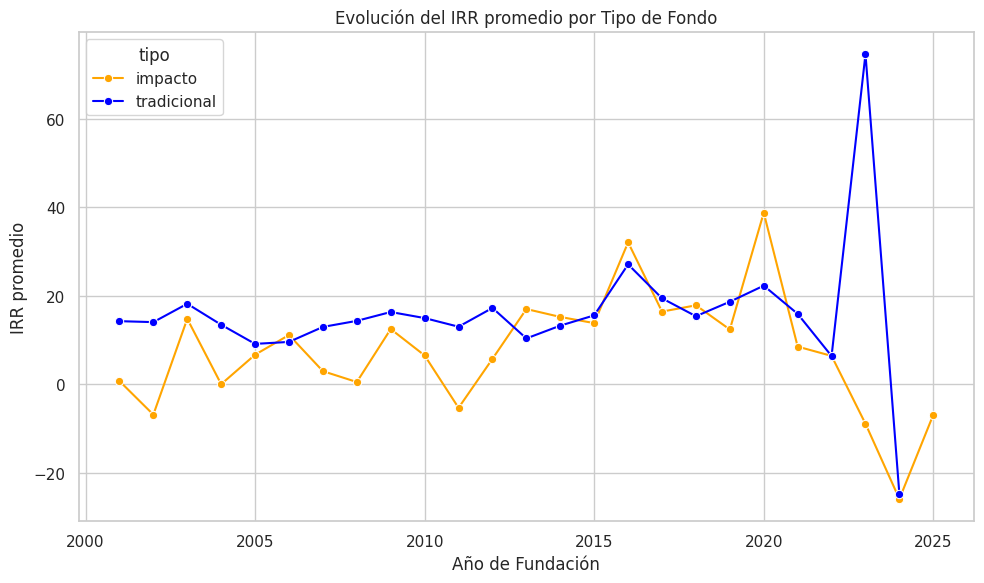

In [9]:
# Línea de evolución del IRR promedio por tipo y año
df_yearly = df_explore.groupby(['Año', 'tipo'])['IRR'].mean().reset_index()

# Definir colores personalizados
colores = {'tradicional': 'blue', 'impacto': 'orange'}

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_yearly, x='Año', y='IRR', hue='tipo', marker='o', palette=colores)

plt.title("Evolución del IRR promedio por Tipo de Fondo")
plt.xlabel("Año de Fundación")
plt.ylabel("IRR promedio")
plt.tight_layout()
plt.show()


